<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Juypter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Ice-age dynamics: 5. Karst
## Rayleigh fractionation
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany* 

In this notebook, we will derive the classical Rayleigh fractionation model, which describes 
the removal of material from a reservoir with **one sink**.

We first load the `python` libraries `numpy` and `matplotlib`.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def change_fonts():
    SMALL_SIZE = 15
    MEDIUM_SIZE = 20
    BIGGER_SIZE = 25

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    
change_fonts()

## One sink

We start with Rayleigh fractionation to **one sink**, e.g. the evaporation of water from the ocean or a lake.
The lake here is the bottom reservoir, the top reservoir on the right-hand side is the vapour.

<img src="images/rayleigh_1sink.jpg">

**Before** fractionation, we describe the **rare** isotope number in the left reservoir (defined before
in another notebook)
$$
[r] = \frac{N R}{1+R}
$$

**After** fractionation starts through evaporation of water, we have to consider the vapour as a sink.
Thus, we need to consider two reservoirs (right side):
- A water reservoir (W, bottom), with the reduced amount of particles $N+\frac{dN}{dt}\Delta t$, and the changed
isotope ratio $R+dR$.
- A vapor reservoir (V, top), with the added particles $-\frac{dN}{dt}\Delta t$ and the change in isotope ratio
$\alpha R$ (consider the definition of the fractionation factor made before in another notebook!).

----
### Balance equation
Balancing the left and right reservoirs, one obtains:
$$
\frac{N R}{1+R} = \frac{(N+\frac{dN}{dt}\Delta t)(R+dR)}{1+R+dR} 
- \frac{\frac{dN}{dt}\Delta t \alpha R}{1+\alpha R}  
$$
To proceed, we make the important assumptions, that both $dR \ll R$ and $\alpha R \sim R$ holds.
Then, all denominators are $1+R$, and we can get rid of these common denominators by multiplicating the
equation with $1+R$:
$$
\begin{array}{rcl}
N R &=& (N+\frac{dN}{dt}\Delta t)(R+dR) - \frac{dN}{dt}\Delta t \alpha R \\
N R &=& N R +dR N + \frac{dN}{dt}\Delta t R + \frac{dN}{dt}\Delta t dR - \frac{dN}{dt}\Delta t \alpha R \\
dR   &\simeq& \frac{dN}{dt}\Delta t \frac{R}{N} \left(\alpha - 1 \right)
\end{array}
$$
For the last line, we have assumed that we can neglect terms of higher order ($dR \frac{dN}{dt}\Delta t$ is small).

----
### Numerical solution
We can rearrange the last equation to an **iterative equation**:
$$
\fbox{$
R_{i} = R_{i-1} + dR_{i-1}
      = R_{i-1} + \frac{R_{i-1}}{N_{i-1}} \left(\alpha - 1 \right) \left(N_{i}-N_{i-1} \right)
$}
$$
which we can solve numerically.

----
### Analytical solution
We derive an analytical solution by rearranging again (separated into variables, and with
the abbreviation $dN=\frac{dN}{dt} \Delta t$):
$$
\frac{dR}{R} = (\alpha - 1) \frac{dN}{N}
$$
Integration of both sides, one obtains as solution: 
$$
\ln R = (\alpha - 1) \ln N + c
$$
We use the boundary conditions $R(N=0) = R(N_0)$, thus $c=\ln R_0 - (\alpha - 1) \ln N_0$:
$$
\ln \frac{R}{R_0} = (\alpha - 1) \ln \frac{N}{N_0}
                  = \ln \left( \frac{N}{N_0} \right)^{\alpha - 1}
$$
Finally applying the exponential function, the **Rayleigh fractionation** is found:
$$
\fbox{$
\frac{R}{R_0} = \left( \frac{N}{N_0} \right)^{\alpha - 1}
$}
$$

Formulated in the delta-notation ($\delta = \frac{R}{R_{std}} - 1$),
we define a reference state $\delta_0$ and arrive at:
$$
\delta = (1+\delta_0) \left( \frac{N}{N_0} \right)^{\epsilon} - 1
$$

----
## Example: Evaporation of water

We consider a water reservoir with one sink, from which water evaporates, and want to calculate the 
evolution of the **oxygen** isotopic composition **in the water**. The chemical reaction is:
$$
H_2{}^{16}O \uparrow + H_2{}^{18}O \downarrow \leftrightarrow
H_2{}^{18}O \uparrow + H_2{}^{16}O \downarrow,
$$
with the arrows indication the vapor reservoir ($\uparrow$) and the water reservoir ($\downarrow$).
The initial isotope ratio is $\delta_0 = 0$‰.

We assume a fractionation factor of $\alpha_{liquid/solid}=0.99$, thus obtaining a fractionation 
of $\epsilon=-0.01$ (depletion). This choice indicates that the heavy isotope is **depleted**
in the vapour phase!

We then define our number of **particles** as $N_0=[a] + [r]$, with 
$[a]=1000$ and $[r]=2$, thus $N_0=1002$. 

The **initial isotope ratio** is then $R_0=0.002$, or 2 permil. We also define this initial sample
as **standard**, thus $\delta_0=0$.

We plot the **fractionation in the remaining water reservoir**.

Note the exmaples for $\alpha_{liquid/solid}=0$ and $\alpha_{liquid/solid}=1.01$ are illustrations
only, they are not realistic!

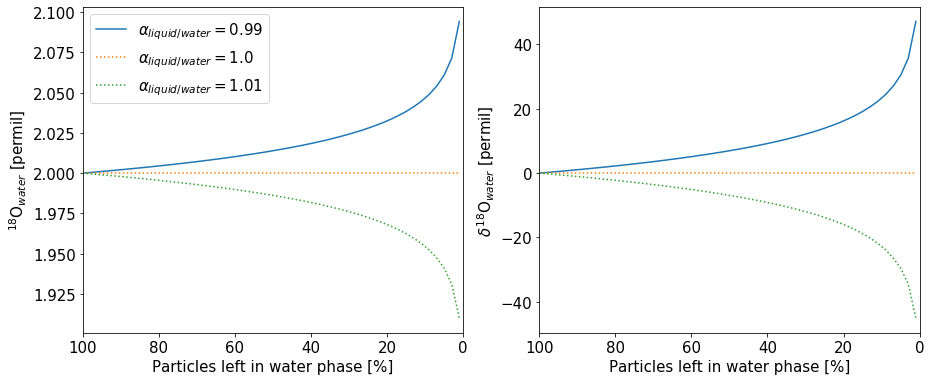

In [6]:
'''
Rayleigh fractionation for a single sink
Example: evaporation of water from a puddle
'''
# initial conditions
abundant = 1000
rare     = 2
N0     = abundant + rare
R0     = rare / abundant
delta0 = 0
# change in reservoir
min=0.01
dN = np.linspace(1.0,min,51)
N = N0*dN
# fractionation factors (liquid(B)/water(A))
alpha1_BA = 0.99
alpha2_BA = 1.00
alpha3_BA = 1.01

R1     = R0 * (N/N0)**(alpha1_BA-1)
delta1 = (1-delta0)*(N/N0)**(alpha1_BA-1) - 1
R2     = R0 * (N/N0)**(alpha2_BA-1)
delta2 = (1-delta0)*(N/N0)**(alpha2_BA-1) - 1
R3     = R0 * (N/N0)**(alpha3_BA-1)
delta3 = (1-delta0)*(N/N0)**(alpha3_BA-1) - 1

plt.figure(figsize=(15.0,6.0))
plot1=plt.subplot2grid((1,2), (0,0), colspan=1,rowspan=1)
plot2=plt.subplot2grid((1,2), (0,1), colspan=1,rowspan=1)
plot1.set_xlim([100,0])
plot1.set_xlabel('Particles left in water phase [%]')
plot1.set_ylabel('$^{18}$O$_{water}$ [permil]')
plot1.plot(100*N/N0,R1*1000,label='$\\alpha_{liquid/water}=$'+str(alpha1_BA))
plot1.plot(100*N/N0,R2*1000,label='$\\alpha_{liquid/water}=$'+str(alpha2_BA),linestyle=':')
plot1.plot(100*N/N0,R3*1000,label='$\\alpha_{liquid/water}=$'+str(alpha3_BA),linestyle=':')
plot1.legend()

plot2.set_xlim([100,0])
plot2.set_xlabel('Particles left in water phase [%]')
plot2.set_ylabel('$\delta^{18}$O$_{water}$ [permil]')
plot2.plot(100*N/N0,delta1*1000,label='$\\alpha_1=$'+str(alpha1_BA))
plot2.plot(100*N/N0,delta2*1000,label='$\\alpha_2=$'+str(alpha2_BA),linestyle=':')
plot2.plot(100*N/N0,delta3*1000,label='$\\alpha_3=$'+str(alpha3_BA),linestyle=':')

plt.savefig('figures/rayleigh_onesink_vapour_water.png',dpi=300)

We extend the example by adding the fractionation in the vapour.

We reformulate the Rayleigh fractionation to the delta-notation, and arrive at
$$
\begin{array}{rcl} 
\delta_W & = & (1+\delta_0) \left( \frac{N}{N_0} \right)^{\epsilon} - 1 \\
\delta_V & = & (1+\delta_0) \frac{1-\left( \frac{N}{N_0} \right)^{\alpha}}{1-\frac{N}{N_0}}  - 1 
\end{array}
$$
for the evolution of the isotopic conditions in the water ($\delta_W$) and the vapor ($\delta_V$),
respectively. Note that the latter needs the solution of an integral!

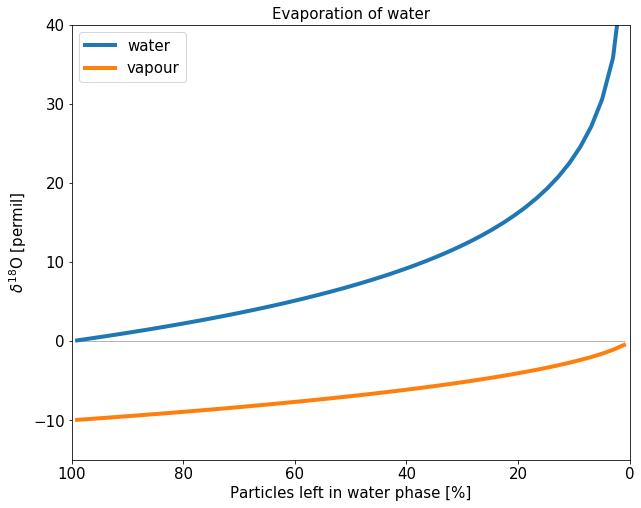

In [10]:
'''
Rayleigh fractionation for a single sink
Example: evaporation of water from a puddle
'''
# initial conditions
abundant = 1000
rare     = 2
N0     = abundant + rare
R0     = rare / abundant
delta0 = 0
# change in reservoir
min=0.01
dN = np.linspace(0.99,min,51)
N = N0*dN
n = len(N)
# fractionation factors (liquid(B)/water(A))
alpha_VW = 0.99
eps_VW   = alpha_VW - 1.

# delta evolving
delta_W = (1+delta0)*(N/N0)**eps_VW - 1
delta_V = (1+delta0)*(1-(N/N0)**alpha_VW) / (1-(N/N0)) -1

# plot
plt.figure(figsize=(10,8))
plt.title('Evaporation of water')
plt.xlabel('Particles left in water phase [%]')
plt.xlim([100.,0.])
plt.xticks([100.,80,60,40,20,0])

plt.ylabel('$\delta^{18}$O [permil]')
plt.ylim([-15.,40.])
plt.yticks([-10,0,10,20,30,40])
plt.plot(100*N/N0,np.repeat(delta0,n),linewidth='1',color=(0.7,0.7,0.7))
plt.plot(100*N/N0,delta_W*1000,linewidth='4',label='water')
plt.plot(100*N/N0,delta_V*1000,linewidth='4',label='vapour')
#plt.plot(fr,x,linewidth='1',label='vapor_exact')
#plt.plot(fr,(delta_vapor-delta_water),label='diff')
plt.legend()
plt.savefig('figures/rayleigh_onesink_vapour_water2.png',dpi=300)
plt.show()

... done